# Apendice 

In [2]:
###%matplotlib notebook
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt
from sympy import MatMul

from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
import subprocess
from IPython.display import HTML
from IPython import display

In [3]:
q11=1
q22=2*q11
v11=1
v22=3*v11
aa=1

In [4]:
t,x,y,z,r,o,a,v1,v2,q1,q2=sp.symbols('t,x,y,z,r,o,a,v1,v2,q1,q2')
#u0=4*np.pi*10**-7

# Matrices para pasar de cartesianas a cilindricas

In [5]:
Cil=sp.Matrix([[sp.cos(o),sp.sin(o),0],[-sp.sin(o),sp.cos(o),0],[0,0,1]])
#MatMul(Cil,rp)
Cart=sp.Matrix([[sp.cos(o),-sp.sin(o),0],[sp.sin(o),sp.cos(o),0],[0,0,1]])

# Campo magnetico en r arbitrario

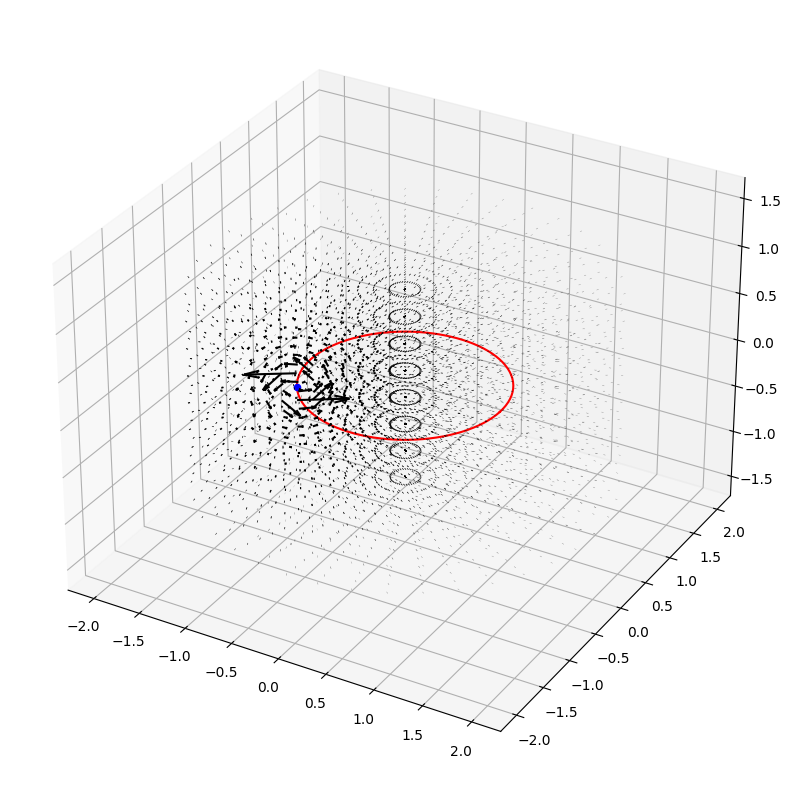

In [6]:
r1=sp.Matrix([r,0,z])#Vectro de posicion cilindrico arbitrario
rp=sp.Matrix([a*sp.cos(v1*t/a),a*sp.sin(v1*t/a),0]) #Posicion en cartesianas de la particula
rpc=sp.simplify(Cil*rp) #Posicion en cartesianas

vrp=sp.simplify(sp.diff(rpc,t))
R=r1-rpc
Bc=vrp.cross(R)/R.norm()**3
Bxyz=Cart*Bc.subs(a,aa).subs(v1,v11)
Bx=sp.lambdify([r,o,z,t],Bxyz[0])
By=sp.lambdify([r,o,z,t],Bxyz[1])
Bz=sp.lambdify([r,o,z,t],Bxyz[2])

rr=np.linspace(0,aa*2,15)
phi=np.linspace(0,2*np.pi,40)
zz=np.linspace(-1,1,8)

RR,P,Z=np.meshgrid(rr,phi,zz)
X=RR*np.cos(P)
Y=RR*np.sin(P)
ts=10
Bxx=Bx(RR,P,Z,ts)
Byy=By(RR,P,Z,ts)
Bzz=Bz(RR,P,Z,ts)

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

BB=np.sqrt(Bxx**2+Byy**2+Bzz**2)
tt=np.linspace(0,2*np.pi,100)
ax.scatter(aa*np.cos(v11*ts/aa),aa*np.sin(v11*ts/aa),0,color='blue')
ax.plot(aa*np.cos(tt),aa*np.sin(tt),0,color='red')
#################################################Campo vectorial###############################
ax.quiver(X,Y,Z,Bxx,Byy,Bzz,color='black',length=1/100)#normalize=true
#ax.streamplot(x_2d, y_2d, z_2d, bxx_2d, byy_2d, bzz_2d, color='b')

#ax.quiver(zz*0,zz*0,zz,Bxx*0/BB,Byy*0/BB,Bz(0,0,zz,0)/Bz(0,0,zz,0),color='black')
plt.axis('equal')
plt.show()

In [247]:
sp.simplify(Bc)

Matrix([
[      v1*z*cos(o - t*v1/a)/(Abs(z)**2 + Abs(a*sin(o - t*v1/a))**2 + Abs(a*cos(o - t*v1/a) - r)**2)**(3/2)],
[     -v1*z*sin(o - t*v1/a)/(Abs(z)**2 + Abs(a*sin(o - t*v1/a))**2 + Abs(a*cos(o - t*v1/a) - r)**2)**(3/2)],
[v1*(a - r*cos(o - t*v1/a))/(Abs(z)**2 + Abs(a*sin(o - t*v1/a))**2 + Abs(a*cos(o - t*v1/a) - r)**2)**(3/2)]])

<function _lambdifygenerated(r, o, z, t)>

# Bz y |B| a lo largo de Z 

In [256]:
sp.simplify(Bc[2].subs(r,0).subs(o,0))

a*v1/(Abs(z)**2 + Abs(a*sin(t*v1/a))**2 + Abs(a*cos(t*v1/a))**2)**(3/2)

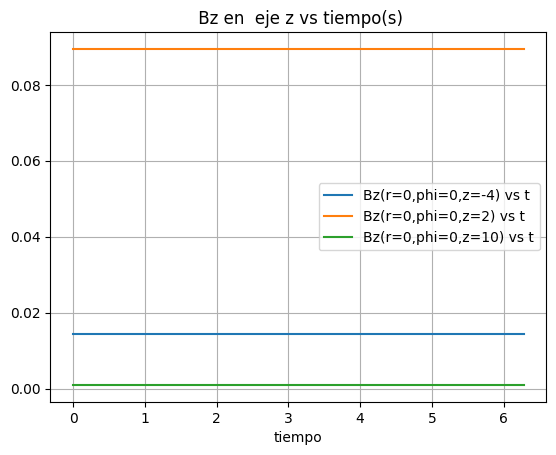

In [179]:
fig3=plt.figure()
plt.plot(tt,Bz(0,0,-4,tt),label='Bz(r=0,phi=0,z=-4) vs t')
plt.plot(tt,Bz(0,0,2,tt),label='Bz(r=0,phi=0,z=2) vs t')
plt.plot(tt,Bz(0,0,10,tt),label='Bz(r=0,phi=0,z=10) vs t')
plt.grid('on')
plt.title(' Bz en  eje z vs tiempo(s)')
plt.xlabel('tiempo')
plt.legend()

 # Variacion B en r=2a

In [192]:
sp.simplify(Bc[2]).subs(r,2*a).subs(o,0).subs(z,0)

v1*(-2*a*cos(t*v1/a) + a)/(Abs(a*sin(t*v1/a))**2 + Abs(a*cos(t*v1/a) - 2*a)**2)**(3/2)

1

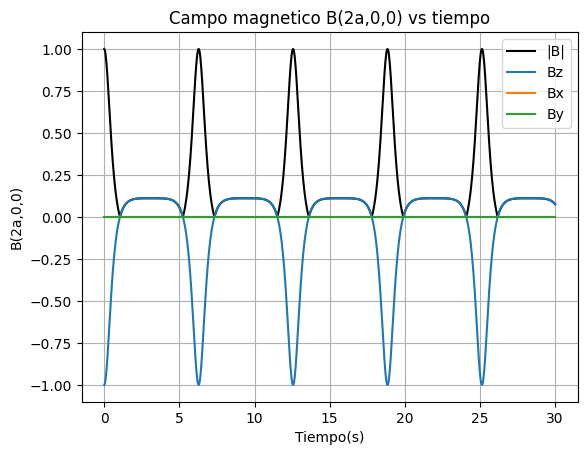

In [257]:
fig2=plt.figure()
th=np.linspace(0,30,1000)
plt.plot(th,np.sqrt(Bx(2*aa,0,0,th)**2+By(2*aa,0,0,th)**2+Bz(2*aa,0,0,th)**2),color='black',label='|B|')
plt.plot(th,Bz(2*aa,0,0,th),label='Bz')
plt.plot(th,Bx(2*aa,0,0,th),label='Bx')
plt.plot(th,By(2*aa,0,0,th),label='By')
plt.grid('on')
plt.legend()
plt.title('Campo magnetico B(2a,0,0) vs tiempo')
plt.ylabel('B(2a,0,0)')
plt.xlabel('Tiempo(s)')
1#plt.axis('equal')

# 4

Text(0.5, 0, 'tiempo')

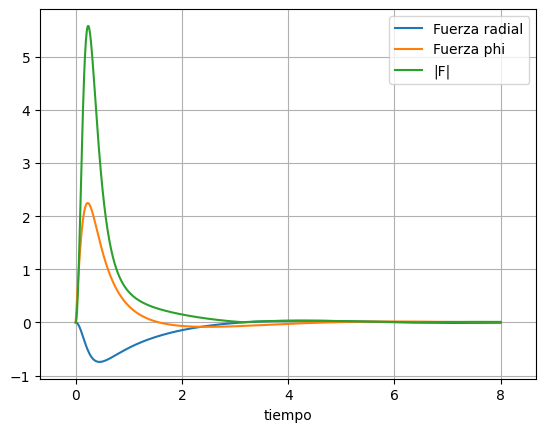

In [8]:
th=np.linspace(0,8,1000)
r2=sp.Matrix([0,0,-v2*t])
vr2=sp.diff(r2,t)
F=q2*(vr2.cross(Bc)).subs(r,0).subs(o,0).subs(z,-v2*t)
F=sp.simplify(F).subs(v1,v11).subs(a,aa).subs(v2,v22).subs(q2,q22)
Fr=sp.lambdify(t,F[0])
Fo=sp.lambdify(t,F[1])
plt.plot(th,Fr(th),label='Fuerza radial')
plt.plot(th,Fo(th),label='Fuerza phi')
plt.plot(th,np.sqrt(Fr(th)**2)+Fo(th)**2,label='|F|')
plt.legend()
plt.axis('equal')
plt.grid('on')
plt.xlabel('tiempo')

In [260]:
F

Matrix([
[-q2*t*v1*v2**2*sin(t*v1/a)/(Abs(a*sin(t*v1/a))**2 + Abs(a*cos(t*v1/a))**2 + Abs(t*v2)**2)**(3/2)],
[ q2*t*v1*v2**2*cos(t*v1/a)/(Abs(a*sin(t*v1/a))**2 + Abs(a*cos(t*v1/a))**2 + Abs(t*v2)**2)**(3/2)],
[                                                                                               0]])

# 5

# Campo magnetico 2 B2

<lambdifygenerated-12>:2: RuntimeWarning: invalid value encountered in divide
  return 3*r*sin(o)/(abs(r)**2 + abs(3*t + z)**2)**(3/2)
<lambdifygenerated-13>:2: RuntimeWarning: invalid value encountered in divide
  return -3*r*cos(o)/(abs(r)**2 + abs(3*t + z)**2)**(3/2)
C:\Users\Arif\AppData\Local\Temp\ipykernel_20288\1324130932.py:35: RuntimeWarning: invalid value encountered in divide
  ax.quiver(X[:,:,7],Y[:,:,7],Z[:,:,7],(Bxx2/BB2)[:,:,7],(Byy2/BB2)[:,:,7],(Bzz2/BB2)[:,:,7],color='black',length=1/10)


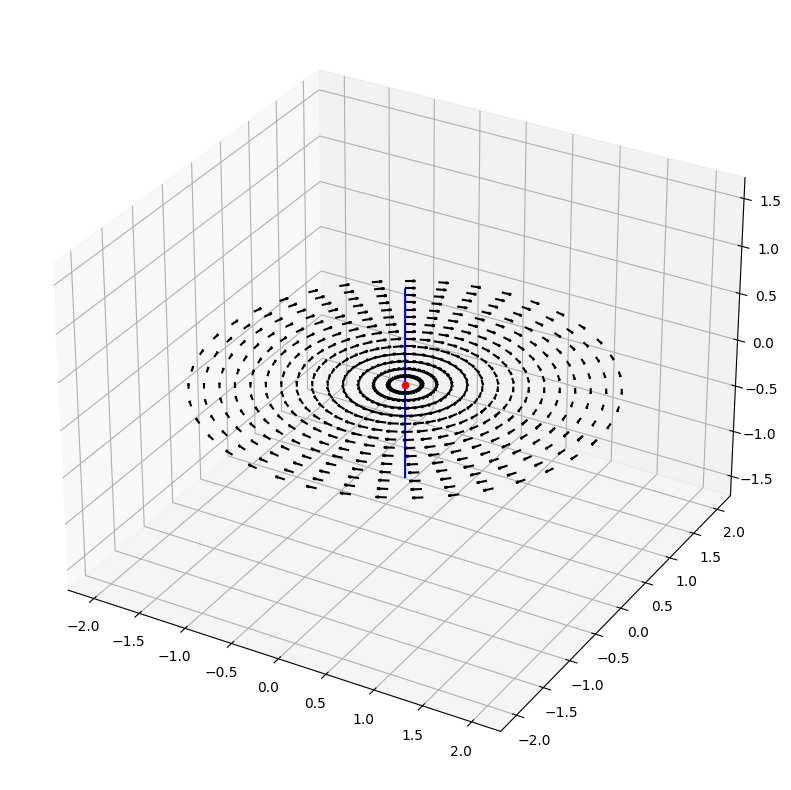

In [11]:
r1=sp.Matrix([r,0,z])#Vectro de posicion cilindrico
 
R=r1-r2

Bc2=vr2.cross(R)/R.norm()**3

Bxyz2=Cart*Bc2.subs(a,1).subs(v1,1).subs(v2,3)


Bx2=sp.lambdify([r,o,z,t],Bxyz2[0])
By2=sp.lambdify([r,o,z,t],Bxyz2[1])
Bz2=sp.lambdify([r,o,z,t],Bxyz2[2])

zz=np.linspace(-1,1,15)

RR,P,Z=np.meshgrid(rr,phi,zz)
X=RR*np.cos(P)
Y=RR*np.sin(P)
ts=0
Bxx2=Bx2(RR,P,Z,ts)
Byy2=By2(RR,P,Z,ts)
Bzz2=Bz2(RR,P,Z,ts)

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

BB2=np.sqrt(Bxx2**2+Byy2**2+Bzz2**2)


ax.scatter(0,0,-v2*ts,color='red')#Puntito
ax.plot(zz*0,zz*0,zz,color='blue')#Trayectoria
#ax.quiver(X,Y,Z,Bxx2,Byy2,Bzz2,color='black',length=1/500)
#ax.quiver(X,Y,Z,Bxx2/BB2,Byy2/BB2,Bzz2/BB2,color='black')

ax.quiver(X[:,:,7],Y[:,:,7],Z[:,:,7],(Bxx2/BB2)[:,:,7],(Byy2/BB2)[:,:,7],(Bzz2/BB2)[:,:,7],color='black',length=1/10)
#ax.streamplot(X[:,:,0],Y[:,:,0],Z[:,:,0],(Bxx2/BB2)[:,:,0],(Byy2/BB2)[:,:,0],(Bzz2/BB2)[:,:,0])
#ax.quiver(X,Y,Z,(Bxx2/BB2)+Bxx/BB,Byy2/BB2+Byy/BB,Bzz2/BB2+Bzz/BB,color='black')
#ax.quiver(X,Y,Z,Bxx2+Bxx,Byy2+Byy,Bzz2+Bzz,color='black')
plt.axis('equal')
plt.show()

In [209]:
sp.simplify(Bc2)

Matrix([
[                                          0],
[-r*v2/(Abs(r)**2 + Abs(t*v2 + z)**2)**(3/2)],
[                                          0]])

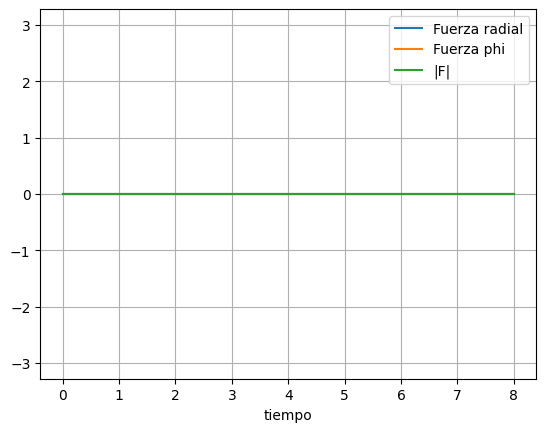

In [234]:
F1=q1*(vrp.cross(Bc2))
F1.subs(r,a).subs(o,v1*t/a).subs(z,0)
Fr=sp.lambdify(t,F1[0])
Fo=sp.lambdify(t,F1[1])
plt.plot(th,th*Fr(th),label='Fuerza radial')
plt.plot(th,th*Fo(th),label='Fuerza phi')
plt.plot(th,th*np.sqrt(Fr(th)**2)+Fo(th)**2,label='|F|')
plt.legend()
plt.xlabel('tiempo')
plt.axis('equal')
plt.grid('on')

In [263]:
F1

Matrix([
[                                                                0],
[                                                                0],
[-q1*r*v1*v2*sin(o - t*v1/a)/(Abs(r)**2 + Abs(t*v2 + z)**2)**(3/2)]])

# Animacion

In [170]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import subprocess
from IPython.display import HTML

In [241]:
ts=np.linspace(0,50,10)
fig5 = plt.figure(figsize=(20,20))
cx = fig5.add_subplot(111, projection='3d')
plt.xlim(min(rr)-1,max(rr)+1)
plt.ylim(min(rr)-1,max(rr)+1)
#cx.set_zlim(min(zz),max(zz))
def updatefi(ii):
    cx.clear()
    plt.xlim(-aa,aa)
    plt.ylim(-aa,aa)
    #cx.set_zlim(-min(zz),max(zz))
    ts=ii
    #Campo carga circular 
    Bxx=Bx(RR,P,Z,ts)
    Byy=By(RR,P,Z,ts)
    Bzz=Bz(RR,P,Z,ts)
    #Campo carga vertical
    Bxx2=Bx2(RR,P,Z,ts)
    Byy2=By2(RR,P,Z,ts)
    Bzz2=Bz2(RR,P,Z,ts)
    
    BB=np.sqrt(Bxx**2+Byy**2+Bzz**2)
    BB2=np.sqrt(Bxx2**2+Byy2**2+Bzz2**2)
    BB3=np.sqrt((Bxx+Bxx2)**2+(Byy+Byy2)**2+(Bzz+Bzz2)**2)
    tt=np.linspace(0,10,100)
    
    cx.scatter(aa*np.cos(v11*ts/aa),aa*np.sin(v11*ts/aa),0,color='blue')#Carga mov circular 
    cx.plot(aa*np.cos(tt),aa*np.sin(tt),0,color='red')#Aro
    ################################carga 2 vertical#####################
    cx.scatter(0,0,-v22*ts,color='blue')#Puntito
    cx.plot(zz*0,zz*0,zz,color='red')#Trayectoria
    #################################################Campo vectorial###############################
    #cx.quiver(X,Y,Z,Bxx,Byy,Bzz,color='black',length=1/10)
    #cx.quiver(X,Y,Z,Bxx2,Byy2,Bzz2,color='black',length=3)
    #cx.quiver(X,Y,Z,Bxx/BB,Byy/BB,Bzz/BB,color='black',length=1/3)#B1
    #cx.quiver(X,Y,Z,Bxx2/BB2,Byy2/BB2,Bzz2/BB2,color='black',length=1/3)#B2
    #cx.quiver(X,Y,Z,(Bxx+Bxx2)/BB3,(Byy+Byy2)/BB3,(Bzz+Bzz2)/BB3,color='black',length=1/3) #B1+B2
    cx.quiver(X,Y,Z,(Bxx+Bxx2),(Byy+Byy2),(Bzz+Bzz2),color='black',length=1/100) #B1+B2
    return fig5


anim = FuncAnimation(fig5, updatefi, frames=ts,interval=24)
# Save the frames to the video file using ffmpeg writer
video=anim.to_html5_video()
html=display.HTML(video)
display.display(html)
plt.close()


<lambdifygenerated-109>:2: RuntimeWarning: invalid value encountered in divide
  return z*sin(o)*sin(o - t)/(abs(z)**2 + abs(r - cos(o - t))**2 + abs(sin(o - t))**2)**(3/2) + z*cos(o)*cos(o - t)/(abs(z)**2 + abs(r - cos(o - t))**2 + abs(sin(o - t))**2)**(3/2)
<lambdifygenerated-110>:2: RuntimeWarning: invalid value encountered in divide
  return z*sin(o)*cos(o - t)/(abs(z)**2 + abs(r - cos(o - t))**2 + abs(sin(o - t))**2)**(3/2) - z*sin(o - t)*cos(o)/(abs(z)**2 + abs(r - cos(o - t))**2 + abs(sin(o - t))**2)**(3/2)
<lambdifygenerated-111>:2: RuntimeWarning: invalid value encountered in divide
  return (-(r - cos(o - t))*cos(o - t) + sin(o - t)**2)/(abs(z)**2 + abs(r - cos(o - t))**2 + abs(sin(o - t))**2)**(3/2)
<lambdifygenerated-112>:2: RuntimeWarning: invalid value encountered in divide
  return 3*r*sin(o)/(abs(r)**2 + abs(3*t + z)**2)**(3/2)
<lambdifygenerated-113>:2: RuntimeWarning: invalid value encountered in divide
  return -3*r*cos(o)/(abs(r)**2 + abs(3*t + z)**2)**(3/2)


5